In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

debug_mode = True

if debug_mode:
    corruption_list = ['gaussian_noise']
else:
    corruption_list = ['gaussian_noise', 'shot_noise', 'impulse_noise', 'defocus_blur', 'glass_blur', 'motion_blur', 'zoom_blur', 'snow', 'frost', 'fog', 'brightness',
                        'contrast', 'elastic_transform', 'pixelate', 'jpeg_compression']
    
num_data = 10000

                 0
count  7122.000000
mean      8.919738
std       1.970250
min       2.313799
25%       7.626440
50%       9.227612
75%      10.339350
max      14.628362
                 0
count  2878.000000
mean      6.885635
std       1.995839
min       1.848309
25%       5.463411
50%       6.742872
75%       8.174570
max      13.657744
                 0
count  7122.000000
mean      4.501981
std      60.915314
min   -3137.954346
25%       1.872262
50%       3.242608
75%       5.843993
max    1167.068726
                 0
count  2878.000000
mean      2.154405
std       2.875729
min       1.000110
25%       1.203452
50%       1.545611
75%       2.277005
max      84.149963


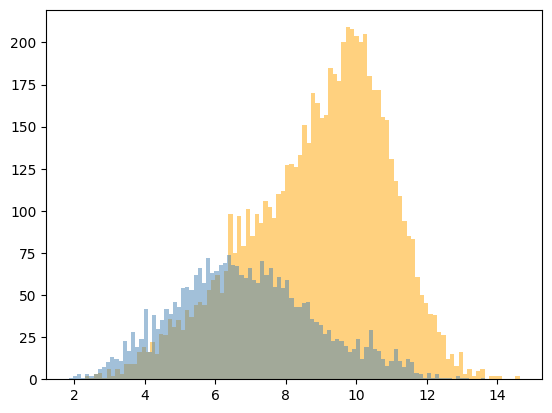

In [3]:
i=0

for corruption in corruption_list:
    save_dir = f'./noadapt_stats/{corruption}.npy'
    outputs = np.load(save_dir)

    data_dir = "/gallery_tate/wonjae.roh/cifar10c"
    labels_path = data_dir + '/labels.npy'
    labels = np.load(labels_path)
    labels = labels[:num_data]

    correct = outputs.argmax(axis=1)==labels
    wrong = ~correct

    correct_outputs = outputs[correct]
    wrong_outputs = outputs[wrong]

    correct_describe = pd.DataFrame(correct_outputs.max(1))

    correct_describe = pd.DataFrame(correct_outputs.max(1))
    print(correct_describe.describe())
    wrong_describe = pd.DataFrame(wrong_outputs.max(1))
    print(wrong_describe.describe())

    correct_probs = np.sort(correct_outputs, axis=1)
    correct_probs = correct_probs[:,::-1]
    correct_ratio = correct_probs[:,0] / correct_probs[:,1]
    print(pd.DataFrame(correct_ratio).describe())

    wrong_probs = np.sort(wrong_outputs, axis=1)
    wrong_probs = wrong_probs[:,::-1]
    wrong_ratio = wrong_probs[:,0] / wrong_probs[:,1]
    print(pd.DataFrame(wrong_ratio).describe())

    plt.figure(i)
    plt.hist(correct_describe, bins=100, density=False, alpha=0.5, histtype='stepfilled', color='orange', edgecolor='none')
    plt.hist(wrong_describe, bins=100, density=False, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')
    i+=1



In [10]:
threshold = 8.0

correct_high = np.sum(correct_describe > threshold)
correct_low = np.sum(correct_describe < threshold)
wrong_high = np.sum(wrong_describe > threshold)
wrong_low = np.sum(wrong_describe < threshold)

print(f'high entropy accuracy : {correct_high / (correct_high + wrong_high)}') # actually confidence, not entropy 
print(f'low entropy accuracy : {correct_low / (correct_low + wrong_low)}')

high entropy accuracy : 0    0.864302
dtype: float64
low entropy accuracy : 0    0.50155
dtype: float64
